In [1]:
import matplotlib.pyplot as plt
import numpy as np
import tensorflow as tf

from tensorflow import keras
from tensorflow.keras import layers, datasets, models
from tensorflow.keras.models import Sequential

# Prepare Dataset

In [2]:
(train_images, train_labels), (test_images, test_labels) = datasets.mnist.load_data()

train_images = train_images.reshape((60000, 28, 28, 1))
test_images = test_images.reshape((10000, 28, 28, 1))

# Normalize pixel values to be between 0 and 1
train_images, test_images = train_images / 255.0, test_images / 255.0

print("TRAIN IMAGES: ", train_images.shape)
print("TEST IMAGES: ", test_images.shape)

TRAIN IMAGES:  (60000, 28, 28, 1)
TEST IMAGES:  (10000, 28, 28, 1)


# Create Model

In [3]:
num_classes = 10
img_height = 28
img_width = 28

model = Sequential([
    layers.Conv2D(64, (3, 3), activation='relu', input_shape=(28, 28, 1)),
    layers.Conv2D(32, 3, padding='same', activation='relu'),
    layers.MaxPooling2D(),
    layers.Conv2D(16, 3, padding='same', activation='relu'),
    layers.MaxPooling2D(),
    layers.Conv2D(64, 3, padding='same', activation='relu'),
    layers.MaxPooling2D(),
    layers.Flatten(),
    layers.Dense(128, activation='relu'),
    layers.Dense(10, activation='sigmoid')
])

# Compile Model

In [4]:
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

In [5]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 26, 26, 64)        640       
                                                                 
 conv2d_1 (Conv2D)           (None, 26, 26, 32)        18464     
                                                                 
 max_pooling2d (MaxPooling2D  (None, 13, 13, 32)       0         
 )                                                               
                                                                 
 conv2d_2 (Conv2D)           (None, 13, 13, 16)        4624      
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 6, 6, 16)         0         
 2D)                                                             
                                                                 
 conv2d_3 (Conv2D)           (None, 6, 6, 64)          9

# Train Model

In [6]:
epochs = 20
history = model.fit(
  train_images, 
  train_labels,
  epochs = epochs
)

Epoch 1/20


C:\Users\nihar\AppData\Local\Programs\Python\Python310\lib\site-packages\keras\backend.py:5585: UserWarning: "`sparse_categorical_crossentropy` received `from_logits=True`, but the `output` argument was produced by a Softmax activation and thus does not represent logits. Was this intended?
  output, from_logits = _get_logits(


1875/1875 [==============================] - 101s 53ms/step - loss: 0.1423 - accuracy: 0.9557
Epoch 2/20
1875/1875 [==============================] - 100s 53ms/step - loss: 0.0450 - accuracy: 0.9860
Epoch 3/20
1875/1875 [==============================] - 99s 53ms/step - loss: 0.0331 - accuracy: 0.9899
Epoch 4/20
1875/1875 [==============================] - 99s 53ms/step - loss: 0.0265 - accuracy: 0.9915
Epoch 5/20
1875/1875 [==============================] - 100s 53ms/step - loss: 0.0234 - accuracy: 0.9925
Epoch 6/20
1875/1875 [==============================] - 99s 53ms/step - loss: 0.0183 - accuracy: 0.9942
Epoch 7/20
1875/1875 [==============================] - 99s 53ms/step - loss: 0.0151 - accuracy: 0.9952
Epoch 8/20
1875/1875 [==============================] - 101s 54ms/step - loss: 0.0134 - accuracy: 0.9955
Epoch 9/20
1875/1875 [==============================] - 100s 54ms/step - loss: 0.0129 - accuracy: 0.9959
Epoch 10/20
1875/1875 [==============================] - 100s 53ms/ste

# Visualize Training Results

Text(0.5, 1.0, 'Training Accuracy and Loss')

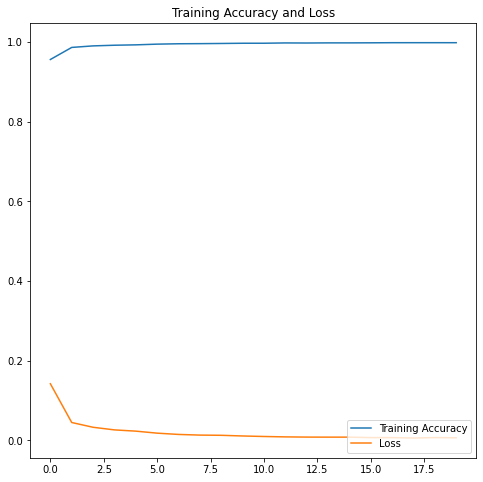

In [7]:
acc = history.history['accuracy']
loss=history.history['loss']

epochs_range = range(epochs)

plt.figure(figsize=(8, 8))
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, loss, label='Loss')
plt.legend(loc='lower right')
plt.title('Training Accuracy and Loss')

# Save Model

In [8]:
model.save("mnist.h5")